<img src= "./6278986_1571298721_Weather_Forecoast_Graphics.jpg"  width = "400" height = "500">

<div style="text-align:center"><span style="font-family:Arial; font-size:2em;"><b>Predicting Weather on Longtitude and Latitude <b></span></div>
<div style="text-align:center"><span style="font-size:1em; color: gray"><b> Kevin Dierich, Victor Yang, Mariam Adwan<b></span></div>

<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Introduction<b></span></div> <hr>

### Weather is a complex phenomenon with many variables that come into play. Some things we know intuitively, like how weather generally gets warmer as you move closer to the equator, but some things require a closer look at the data. Using the data we found, we decided to take two approaches to analyzing weather with respect to geographical location. First, we did an exploratory analysis of latitude (north-south) and geographical region, seeing how well the data agrees with our intuition. For example, as latitude decreases, the closer we get to the equator, the more we can expect intuitively that average temperatures will rise. 

### After that, we decided to make a predictive analysis of weather with respect to longitude (east-west), both to examine the effects of geography on weather that may not be as intuitive, as well as to explore the predictive power of a single attribute of geographical location. We then take both longitude and latitude as features to see how well this improves our predictions. 

### While this is a simplistic examination of what influences weather, it's interesting to see how powerful a simple measure can be for something so complex. While something like this might not be useful a weather station trying to predict the daily weather, it can be very useful for the general public when trying to make decisions such as deciding where to look for housing.

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Part 1: Data Collection<b></span></div> <hr>

### Our data comes from Global Historical Climatology Network (GHCN). This is an integrated database of climate summaries from land based surface stations from across the globe.  Overall, it is a composite of climate records from numerous sources that were merged together and subjected to quality assurance reviews.  Our specific dataset comes from a portion from 2017 that ranges from January to September.  If interested more about the dataset, visit https://docs.opendata.aws/noaa-ghcn-pds/readme.html

In [2]:
# Read in the csv file
weather_table = pd.read_csv("weather.csv")
weather_table.head()

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP
0,GUAM INTL AP,GU,13.4836,144.7961,77.4,20170312,71.06,87.08,80.06,4.473880,360.0,21.027236,0.0,0.0,0.0
1,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170404,77.00,86.00,NaN,8.947760,360.0,23.040482,NaN,NaN,0.0
2,ROOSEVELT ROADS,PR,18.2550,-65.6408,10.1,20170420,NaN,NaN,NaN,8.500372,360.0,21.922012,NaN,NaN,0.0
3,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170120,69.08,82.04,NaN,3.355410,360.0,17.000744,0.0,0.0,0.0
4,SAN JUAN L M MARIN AP,PR,18.4325,-66.0108,2.7,20170217,73.04,87.08,NaN,4.697574,360.0,19.908766,0.0,0.0,0.0


<b>After the raw dataset has been loaded into a dataframe, we can see 15 different columns of data. Most of these are <br>
self explanatory, but some aren't. To better understand the columns, let's explain each of them:<br>
<br>
 - station: This is the name of the weather station that the data originates from<br>
 - state: which state of the United States the station exists in. This includes U.S. territories<br>
 - latitude: the geographical latitude of the station<br>
 - [longitude: the geographical longitude of the station<br>
 - elevation: the geographical elevation of the station<br>
 - date: the date that a given recording is made<br>
 - TMIN: the minumum temperature (Fahrenheit) for the [given date<br>
 - TMAX: the maximum temperature (Fahrenheit) for a given date<br>
 - TAVG: the average temperature (Fahrenheit) for a given date<br>
 - AWND: the average daily wind speed (measured in tenths of a meter per second)<br>
 - Wweather_table5: the direction of the fastest 5-second wind (measured in degrees)<br>
 - WSF5: the fastest 5-second wind speed (measured in tenths of a meter per second)<br>
 - SNOW = the amount of snow fall (mm) for a given date<br>
 - SNWD = the amount of snow depth (mm) for a given date<br>
 - PRCP = the amount of preciptation (tenths of mm) for a given date<br>
<br></b>

<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Part 2: Data Processing<b></span></div> <hr>

### Let us first go through one approach of processing our data. For this method, we will be focusing solely on the 50 states of the US. To process this data as well as obtain future data that we want, we will be building new dataframe columns in order to host the new calculated values to use. The first step is to group these 50 states into the four main regions, the Northeast, Midwest, South, and West. To do this we identify which states belong to which region and place them into their respective positions. This will be used later on. 

In [3]:
# group the 50 states together in the four main regions
D1 = ['CT', 'ME', 'MA', 'NH', 'RI', 'VT', 'NJ', 'NY', 'PA']
D2 = ['IL', 'IN', 'MI', 'OH', 'WI', 'IA', 'KS', 'MN', 'MO', 'NE', 'ND', 'SD']
D3 = ['DE', 'FL', 'GA', 'MD', 'NC', 'SC', 'VA', 'WV', 'AL', 'KY', 'MS', 'TN', 'LA', 'OK', 'TX', 'AR']
D4 = ['AZ', 'CO', 'ID', 'MT', 'NV', 'NM', 'UT', 'WY', 'AK', 'CA', 'HI', 'OR', 'WA']

weather_table['region'] = weather_table.apply(lambda r: 'Northeast' if r.state in D1 
                        else 'Midwest' if r.state in D2
                        else 'South' if r.state in D3
                        else 'West' if r.state in D4
                        else 'dummy', axis=1)

weather_table = weather_table.loc[weather_table['state'].isin(D1+D2+D3+D4)]

### Now that we have our first new dataframe, lets take a look at what we got!

In [4]:
weather_table

,station,state,latitude,longitude,elevation,date,TMIN,TMAX,TAVG,AWND,WDF5,WSF5,SNOW,SNWD,PRCP,region
7,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170207,-0.76,22.10,13.64,3.802798,360.0,14.092722,0.118110,22.047256,0.000000,West
8,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170330,37.04,53.96,44.24,4.026492,360.0,19.908766,0.000000,0.000000,0.070866,West
9,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170622,35.96,73.04,59.72,3.579104,360.0,19.013990,0.000000,0.000000,0.000000,West
10,KALISPELL GLACIER AP,MT,48.3042,-114.2636,901.3,20170725,53.06,87.08,71.60,6.039738,360.0,21.922012,0.000000,0.000000,0.000000,West
11,LAMAR MUNI AP,CO,38.0700,-102.6881,1129.0,20170129,26.24,64.94,NaN,13.197946,360.0,31.093466,0.000000,0.000000,0.000000,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416930,MARSHALLTOWN MUNI AP,IA,42.1128,-92.9175,296.9,20170221,29.12,62.96,NaN,6.934514,NaN,NaN,0.000000,0.000000,0.000000,Midwest
416931,AMES MUNI AP,IA,41.9922,-93.6217,283.5,20170221,29.12,64.04,NaN,7.605596,NaN,NaN,0.000000,0.000000,0.000000,Midwest
416932,LAMONI MUNI AP,IA,40.6331,-93.9019,344.7,20170221,41.00,69.08,NaN,6.934514,NaN,NaN,NaN,NaN,0.000000,Midwest
416933,SISSETON MUNI AP,SD,45.6689,-96.9914,353.9,20170102,16.16,26.24,NaN,8.947760,NaN,NaN,4.606302,3.149608,0.311024,Midwest


### As we can see, every row now has a new column that identifies which region of the US that state belongs in. Now lets use this new dataframe and see what we can do with it. Lets attempt to organize the data and group them by state. Lets also try to aggregate the some columns together and compute the monthly averages for temperature, snow, and precipitation

In [5]:
# construct a new dataframe containing aggregated data in new columns
# This new dataframe contains the monthly averages of temperature, snow, and preciptation. 
weather_table1 = weather_table.groupby(['state', weather_table['date'].astype(str).str[:6]]).agg(
    tMonAvg=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    sMonAvg=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    pMonAvg=pd.NamedAgg(column='PRCP', aggfunc='mean'),
).reset_index()
weather_table1.dropna(inplace=True)
weather_table1

,state,date,tMonAvg,sMonAvg,pMonAvg
0,AK,201701,9.968648,0.430789,0.104087
1,AK,201702,14.072816,0.495595,0.088712
2,AK,201703,10.452816,0.259014,0.043438
3,AK,201704,35.322846,0.037367,0.036018
4,AK,201705,44.177581,0.023537,0.081620
...,...,...,...,...,...
445,WY,201705,42.291427,0.128300,0.076873
446,WY,201706,51.460692,0.000000,0.056949
447,WY,201707,60.303251,0.000000,0.036486
448,WY,201708,55.407370,0.000000,0.031746


<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Part 3: Exploratory Analysis & Data Visualization<b></span></div> <hr> 

### Okay! Our new dataframe is looking solid. It contains values that can be used to interpolate or track various aspects of weather in the US. Lets look at a basic example of how we can use this data. 

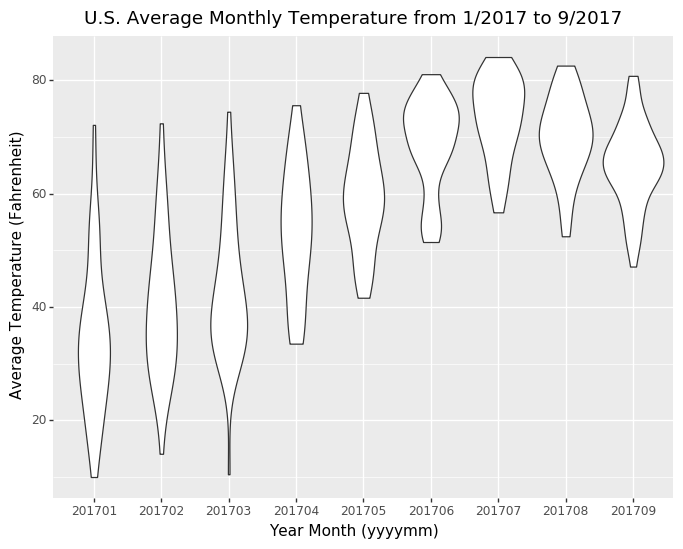

<ggplot: (-9223371930194502380)>

In [6]:
# This plot shows the temperature pattern trends up from January to July
# then gradually trend down after peaking at July
ggplot(aes(x='factor(date)', y='tMonAvg'), data=weather_table1) +\
    geom_violin() +\
    labs(title="U.S. Average Monthly Temperature from 1/2017 to 9/2017",
         x = "Year Month (yyyymm)",
         y = "Average Temperature (Fahrenheit)") +\
    theme(figure_size=(8, 6))

### This visual shows the overall monthly average temperature of the entire US and we can see the general temperature trends throughout the year. We see that the data starts in January which is in the middle of winter. This plot reflects that fact as the density of the states with lower temperatures has greater weight compared to those with higher temperatures. As the year goes on and the seasons transition from winter to spring, we can see a gradual increase in the density of states toward a higher concentration of higher temperature as well as the overall increasing trend of total temperature. As the heat peaks mid-summer in July, we can then start to see the gradual decrease in temperature as the seasons transition into fall. The density of states also start to congregate into the lower half as well. 

### Lets take another perspective of this dataset 

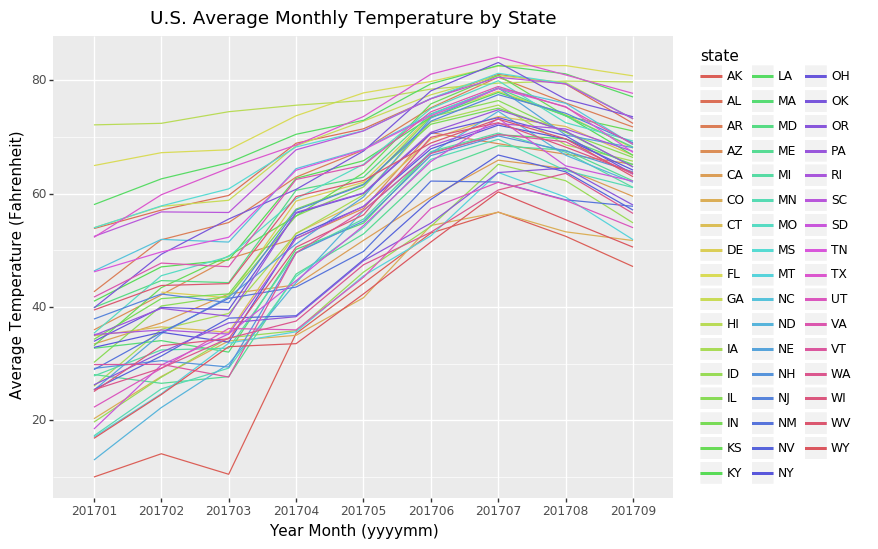

<ggplot: (-9223371930190958204)>

In [7]:
# Alaska was below freezing from January to March and warm up starting April
# Florida and Hawaii are warmest in the US during the winter
# Texas had highest average temperature in US during June to July 2017
ggplot(aes(x='factor(date)', y='tMonAvg', colour='state'), data=weather_table1) +\
    geom_line(aes(group='state')) +\
    labs(title="U.S. Average Monthly Temperature by State",
         x = "Year Month (yyyymm)",
         y = "Average Temperature (Fahrenheit)") +\
    theme(figure_size=(8, 6))

### This plot is a bit straightforward but can be quite revealing. As we can see, every state has their average temperature displayed over the course of the year. This plot can be used to directly identify states and their respective average temperatures over the year. An interesting note is that some states can be seen with high spikes in temperature such as Alaska, denoted with the most bottom red line. Compare this to the yellowish-green lines that track hot Southern states such as Florida and Georgia and we can notice that even in the winter, they remain high in temperature. 

### Now lets try constructing another dataframe slightly more complicated. This is similar, yet different to our later on longitudinal approach in that both divide the areas of notice into separate intervals. 

In [8]:
# construct new dataframe which a new latcode column that can be used to store values pertaining 
# to the interval they are located in
weather_table2 = weather_table.copy()
weather_table2['latitude'] = pd.cut(weather_table2.latitude, 10)
weather_table2 = weather_table2.groupby(['latitude', weather_table2['date'].astype(str).str[:6]]).agg(
    TMAvg=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    SMAvg=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    PMAvg=pd.NamedAgg(column='PRCP', aggfunc='mean'),
    WMAvg=pd.NamedAgg(column='AWND', aggfunc='mean'),
).reset_index()
weather_table2['latcode'] = weather_table2.latitude.cat.codes
weather_table2

,latitude,date,TMAvg,SMAvg,PMAvg,WMAvg,latcode
0,"(19.668, 24.876]",201701,72.309548,0.000000,0.062818,8.769166,0
1,"(19.668, 24.876]",201702,72.777714,0.000000,0.131204,9.405134,0
2,"(19.668, 24.876]",201703,74.389419,0.000000,0.071914,8.783597,0
3,"(19.668, 24.876]",201704,75.993200,0.000000,0.116667,9.575035,0
4,"(19.668, 24.876]",201705,77.429677,0.000000,0.053943,9.258947,0
...,...,...,...,...,...,...,...
85,"(66.127, 71.283]",201705,39.658710,0.113454,0.020482,10.121071,9
86,"(66.127, 71.283]",201706,52.556000,0.006562,0.016110,11.881134,9
87,"(66.127, 71.283]",201707,57.611290,0.000000,0.064056,10.118522,9
88,"(66.127, 71.283]",201708,47.525484,0.009727,0.100251,9.512046,9


### This dataframe is quite interesting. Each state, has their latitude calculated and used to sort them into respective intervals. Here, the US will be divided into 10 intervals of latitude starting from 19.668 generally represents the most southern section of the US. This progresses up to latitude 66.127 which signifies the northernmost part of the US such as Alaska and Maine. The intervals along the x-axis will be grouped to signify a range of latitude that the states will reside in. Because the original dataset contains only nine months, there are 9 points in the plot per latitude range. Each dot represents a single month of whichever states resides within that month and latitude interval. Therefore, there are 9 dots per latitude range for each of the nine months reported by all weather stations inside that range. 

[Text(0, 0, 'zero'),
 Text(0, 0, '(19.668, 24.876]'),
 Text(0, 0, '(30.032, 35.188]'),
 Text(0, 0, '(40.345, 45.501]'),
 Text(0, 0, '(50.658, 55.814]'),
 Text(0, 0, '(60.97, 66.127]')]

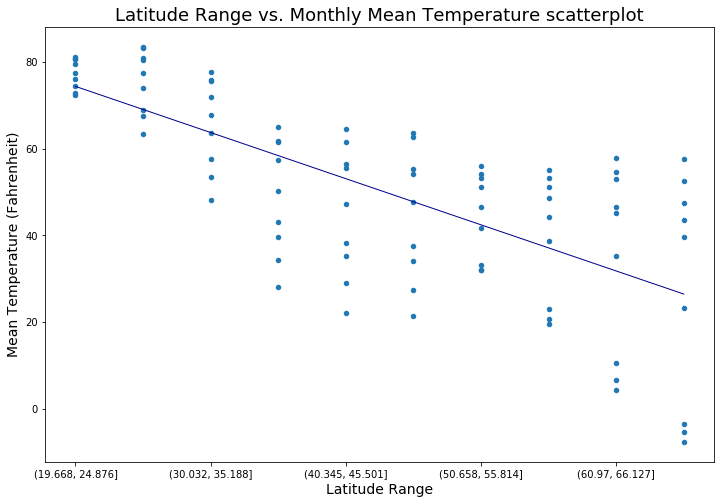

In [9]:
# The latitude of US is divided into 10 equal regions from south to north 
# as 0 to 9 latitude codes and plot the chart against the monthly average temperature.
# 1. Since the data contains 9 months there are 9 dots per latitude range.  Each dot 
#    represent the average of the monthly temperature reported by all weather stations
#    inside the latitude band (bin)
# 2. The temperature is trending lower from south (lower latitude) to north (higher latitude)
# 3. The temperature range is narrower in south, and wilder swing trending north
# 4. The temperature can be linear regression trending lower from south to north
ax2 = weather_table2.plot(kind='scatter', x='latcode', y='TMAvg', figsize=(12, 8))
fit = np.polyfit(weather_table2.latcode, weather_table2.TMAvg, 1)
plt.plot(weather_table2.latcode, fit[0] * weather_table2.latcode + fit[1], color='darkblue', linewidth=1)
ax2.set_title('Latitude Range vs. Monthly Mean Temperature scatterplot', fontsize=18)
ax2.set_xlabel('Latitude Range', fontsize=14)
ax2.set_ylabel('Mean Temperature (Fahrenheit)', fontsize=14)
ax2.set_xticklabels(['zero']+[weather_table2.latitude.unique()[2*x] for x in range(5)])

### Let's see what happened here. At the left of the plot, we see the dots representing the months and the average temperature displayed. We can see that they are quite clustered together and with small variance. A regression line is plotted to display the trends of the monthly mean. As the plot progresses to the right, we see a trending decrease in mean temperature. Not only that, we can see an increase in variance with the highest level of variance being the rightmost one. It is interesting to see how much farther apart each month grows from the regression line. What can we take away? Throughout the year, southern US states remain relatively hot. However as you go up farther north, more and more variance can be detected because of the various mountain ranges and natural features that inhabit the more central areas of the US. In the north, temperatures can be widely varied with the onset of storms in certain areas as well as Alaska being relatively isolated and far from the rest of the states. 

### Lets see what else we can do with this

[Text(0, 0, 'zero'),
 Text(0, 0, '(19.668, 24.876]'),
 Text(0, 0, '(30.032, 35.188]'),
 Text(0, 0, '(40.345, 45.501]'),
 Text(0, 0, '(50.658, 55.814]'),
 Text(0, 0, '(60.97, 66.127]')]

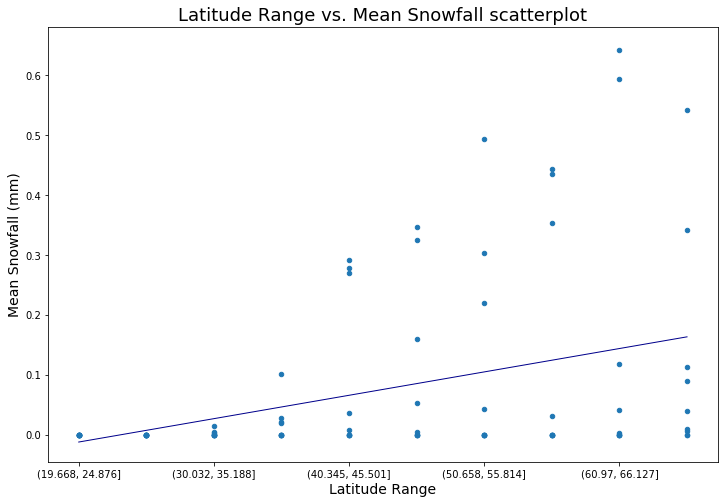

In [10]:
# The same latitude ranges plot against the monthly average snow fall.  This is reverse 
# of the temperature chart above more snow fall when temperature is lower
# 1. Again it contains 9 months of weather data and there are 9 dots per latitude range
# 2. The snowfall is trending higher from south (lower latitude) to north (higher latitude)
# 3. There are not much snowfall in south and only in winter time, and the higher latitude
#    winter months are longer with more snowfall
# 4. The snowfall can be linear regression trending higher from south to north
ax21 = weather_table2.plot(kind='scatter', x='latcode', y='SMAvg', figsize=(12, 8))
fit = np.polyfit(weather_table2.latcode, weather_table2.SMAvg, 1)
plt.plot(weather_table2.latcode, fit[0] * weather_table2.latcode + fit[1], color='darkblue', linewidth=1)
ax21.set_title('Latitude Range vs. Mean Snowfall scatterplot', fontsize=18)
ax21.set_xlabel('Latitude Range', fontsize=14)
ax21.set_ylabel('Mean Snowfall (mm)', fontsize=14)
ax21.set_xticklabels(['zero']+[weather_table2.latitude.unique()[2*x] for x in range(5)])

### This plot is relatively the same as the one above except it operates on another aspect. This time snowfall is looked at instead of temperature. Much like before we can see a trend. States located in the southern parts of the US experience rather little snowfall compared to others. However, as the plot progresses to the right and the intervals continue to go upwards toward the north, we can see higher levels of variance in the amount of snowfall.

### Let's try a couple more ways

In [11]:
# create new dataframe calculating the average tempurature, snow, and precipitation of each of the four US regions
weather_table3 = weather_table.groupby('region').agg(
    TRAvg=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    SnowAvg=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    PRCPAvg=pd.NamedAgg(column='PRCP', aggfunc='mean'),
).reset_index()
weather_table3.dropna(inplace=True)
weather_table3

,region,TRAvg,SnowAvg,PRCPAvg
0,Midwest,54.148433,0.062163,0.097399
1,Northeast,54.411037,0.162265,0.120949
2,South,67.728183,0.005221,0.148854
3,West,44.231359,0.044222,0.104804


### This dataframe is very simple. It simply calculates the averages of temp, snow and precipitation. In addition, all the states have been grouped into their respective regions. This simple dataset can be used for simple plots that can be quite helpful if someone were to want to know average weather conditions in certain regions. 

[Text(0, 0, 'Midwest'),
 Text(0, 0, 'Northeast'),
 Text(0, 0, 'South'),
 Text(0, 0, 'West')]

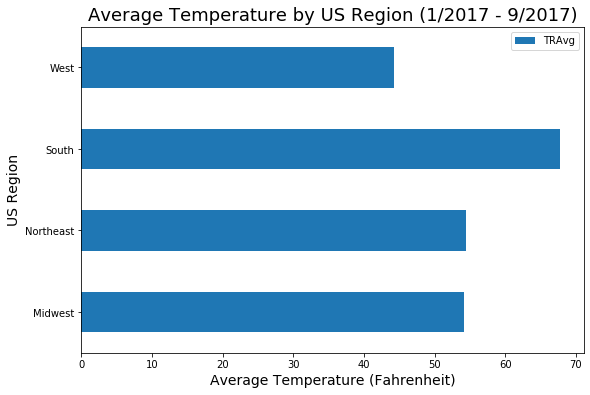

In [12]:
tx = weather_table3.plot.barh(y='TRAvg', figsize=(9, 6))
tx.set_title('Average Temperature by US Region (1/2017 - 9/2017)', fontsize=18)
tx.set_xlabel('Average Temperature (Fahrenheit)', fontsize=14)
tx.set_ylabel('US Region', fontsize=14)
tx.set_yticklabels(["{:}".format(weather_table3['region'][x]) for x in tx.get_yticks()])

### The result of this data is quite obvious. At a glance, readers can obtain the general temperature of each region throughout the entire year. We can see that similar to our above plots, the South has remained first place in retaining areas with the highest temperatures. Other regions such as the Northeast and Midwest remain relatively the same. However it is important to note that this is for the entire year with less detail pertaining to monthly information. Therefore, when processing, it is critical to note the type and purpose of the data being processed and its role to fulfill. 

### Let's look at one last dataframe. 

In [13]:
# create new dataframe calculating total tempurature, snow, and precipitation for the four regions
weather_table4 = weather_table.groupby(['region', weather_table['date'].astype(str).str[:6]]).agg(
    TempTotal=pd.NamedAgg(column='TAVG', aggfunc='mean'),
    SnowTotal=pd.NamedAgg(column='SNOW', aggfunc='mean'),
    PRCPTotal=pd.NamedAgg(column='PRCP', aggfunc='mean'),
).reset_index()
weather_table4.dropna(inplace=True)
weather_table4

,region,date,TempTotal,SnowTotal,PRCPTotal
0,Midwest,201701,26.607244,0.241206,0.063245
1,Midwest,201702,35.287143,0.139098,0.038787
2,Midwest,201703,38.456606,0.150160,0.082340
3,Midwest,201704,51.806270,0.027125,0.151288
4,Midwest,201705,58.829762,0.003095,0.127406
5,Midwest,201706,70.613130,0.000000,0.120768
6,Midwest,201707,74.928864,0.000000,0.105489
7,Midwest,201708,68.901851,0.000000,0.112843
8,Midwest,201709,64.814635,0.000000,0.049393
9,Northeast,201701,33.218015,0.289361,0.101598


### The only differences between this set of data and the one above is that instead of average, it calculates the total temperature, snow level, and precipitation. We can use this combined with the states already grouped in regions to look at some interesting facts. 

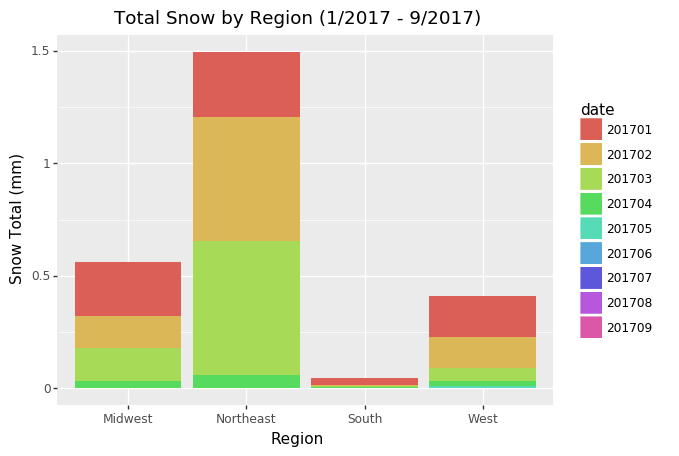

<ggplot: (-9223371930177914916)>

In [14]:
ggplot(weather_table4[['region', 'date', 'SnowTotal']], aes('region', 'SnowTotal', fill='date')) +\
    geom_col() +\
    labs(title="Total Snow by Region (1/2017 - 9/2017)",
         x = "Region",
         y = "Snow Total (mm)")

### Here each region has their total snow level displayed in relation to the month. We can see that since the dataset starts in January, snow levels across the US remains at large while the South still follows the same trends and predictions we saw earlier. Meanwhile. darker colors would represent later months and their levels of snow. However, we can see that there is little to no snow of these particular colors. This coincides with the transitioning of seasons toward summer with the decrease of snow each month until mid March to April which is represented in green. 

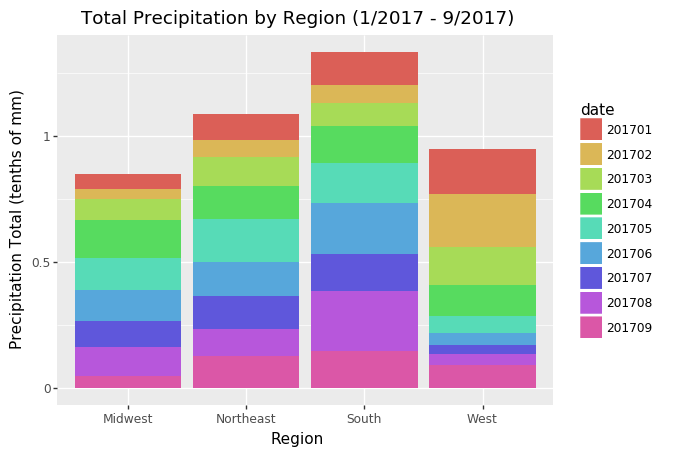

<ggplot: (-9223371930189916940)>

In [15]:
ggplot(weather_table4[['region', 'date', 'PRCPTotal']], aes('region', 'PRCPTotal', fill='date')) +\
    geom_col() +\
    labs(title="Total Precipitation by Region (1/2017 - 9/2017)",
         x = "Region",
         y = "Precipitation Total (tenths of mm)")

### What can we do with precipitation? As with the above, each color represents a different month while the size of the color and space it takes up physically represents the amount of precipitation within that region. Since this encompasses all precipitation and now just snow, The regions of the US are more consistent with their precipitation levels. 

<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Part 4: Analysis & Hypothesis Testing & ML <b></span></div> <hr> 

### Since an exploratory analysis of the relationship between latitude and geographical region with weather has been shown to give some interesting patterns, we decided to examine an unexplored aspect of geographical location to see if we could go beyond exploration into making predictions. While it was clear both through the data and through common sense that latitude would have an effect on weather, it wasn't clear how much of an effect longitude would have. So for that reason we decided to look into the effects of longitude and how well of a predictor it could be of various aspects of weather.

In [16]:
# Remove unnecessary data
weather_table = pd.read_csv("weather.csv")
weather_table.drop(['station', 'state', 'TAVG', 'WDF5', 'WSF5', 'SNOW'], axis = 1, inplace = True)
weather_table.head()

,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP
0,13.4836,144.7961,77.4,20170312,71.06,87.08,4.473880,0.0,0.0
1,18.2550,-65.6408,10.1,20170404,77.00,86.00,8.947760,NaN,0.0
2,18.2550,-65.6408,10.1,20170420,NaN,NaN,8.500372,NaN,0.0
3,18.4325,-66.0108,2.7,20170120,69.08,82.04,3.355410,0.0,0.0
4,18.4325,-66.0108,2.7,20170217,73.04,87.08,4.697574,0.0,0.0


### For this we decided to take a different approach to data processing and cleaning. This time we decided to read in the data again and remove unnecessary data columns in the dataframe. After removing the unnecessary data, we checked for null values.

In [17]:
# Check for null values [category : quantity of nulls]
print(weather_table.isnull().sum())
print(len(weather_table.index))

latitude          0
longitude         0
elevation         0
date              0
TMIN           1344
TMAX           1273
AWND         182057
SNWD         104495
PRCP           1972
dtype: int64
416937


### Columns AWND and SNWD seemed to have a lot of nulls. TMIN, TMAX, and PRCP contained null values as well. To combat this, rows with null values were dropped and the index for the dataframe was reset.

In [18]:
# Drop rows with null values
weather_table = weather_table.dropna()
weather_table.reset_index(drop = True, inplace=True)
print(weather_table.isnull().sum())
print(len(weather_table.index))

latitude     0
longitude    0
elevation    0
date         0
TMIN         0
TMAX         0
AWND         0
SNWD         0
PRCP         0
dtype: int64
136088


### Alright, now we've got a beautiful dataset free of null values and unnecessary data columns. To further pretty-up the dataframe, longitudinal values are cast as whole integers and sorted from least to greatest.

In [19]:
# Round longitudinal values, sort more longitudinal value
weather_table.longitude = weather_table.longitude.round(decimals=0)
weather_table.longitude = weather_table.longitude.astype(int)
weather_table = weather_table.sort_values(by=['longitude'])
weather_table.reset_index(inplace=True)
weather_table

,index,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP
0,42151,57.1553,-170,10.7,20170128,16.16,29.12,14.987498,18.110246,0.098425
1,8235,57.1553,-170,10.7,20170404,19.22,24.26,17.224438,0.000000,0.000000
2,8236,57.1553,-170,10.7,20170419,29.12,35.96,17.224438,0.000000,0.000000
3,57886,57.1553,-170,10.7,20170226,30.20,37.04,12.303170,0.000000,0.200788
4,103944,57.1553,-170,10.7,20170303,26.24,31.10,13.197946,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
136083,109091,15.1167,146,65.5,20170127,73.94,84.02,19.461378,0.000000,0.110236
136084,109092,15.1167,146,65.5,20170130,75.02,84.92,16.329662,0.000000,0.129921
136085,109093,15.1167,146,65.5,20170131,77.00,84.92,16.105968,0.000000,0.011811
136086,109086,15.1167,146,65.5,20170108,73.94,82.04,17.000744,0.000000,0.118110


### Since our predictive analysis relies heavily on longitudinal data records, it's important to see which longitudinal values are available in our dataset

In [20]:
print(weather_table['longitude'].unique())

[-170 -165 -163 -162 -159 -158 -157 -156 -155 -152 -150 -148 -145 -140
 -135 -132 -125 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114
 -113 -112 -111 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100
  -99  -98  -97  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86
  -85  -84  -83  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72
  -71  -70  -69  -68  -66  -65  145  146]


### For the most part the longitudinal data looks great. The longitudinal values increment gradually, with the only major jump being from -65 to 145. The gradually incrementing data will work perfectly for developing a predictive analysis, but the major jump in the data might cause some problems. Since the longitudinal values >145 represents only a small subset of data in our dataset, it won't be a problem to simply drop those values.

In [21]:
# Dropping rows with values greater than 0
# Only includes about 500 rows with longitudes significantly different from the majority
# I didn't want the massive jump in longitude from -65 to 144 as it'd make the graphs looks weird
# Besides, longitudes from -65 through -170 is plenty
for index, row in weather_table.iterrows():
    if (weather_table.loc[index, 'longitude'] > 0):
        weather_table.drop(index, inplace=True)

### Next, we're going to categorize the available longitudinal data into intervals of 5. This will be useful for further processing.

In [22]:
# Categorize longitudes by intervals of 5
B = [-65, -70, -75, -80, -85, -90, -95, -100, -105, -110, -115,\
     -120, -125, -130, -135, -140, -145, -150, -155, -160, -165, -171]
LI = ['-65  -  -70', '-70  -  -75', '-75  -  -80', '-80  -  -85', '-85  -  -90','-90  -  -95',\
      '-95  -  -100', '-100  -  -105', '-105  -  -110', '-110  -  -115', '-115  -  -120',\
      '-120  -  -125', '-125  -  -130', '-130  -  -135', '-135  -  -140', '-140  -  -145',\
      '-145  -  -150', '-150  -  -155', '-155  -  -160', '-160  -  -165', '-165  -  -170']
weather_table['longitudinal_interval'] = pd.cut(weather_table.longitude, bins = B[::-1], labels = LI[::-1])
weather_table

,index,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP,longitudinal_interval
0,42151,57.1553,-170,10.7,20170128,16.16,29.12,14.987498,18.110246,0.098425,-165 - -170
1,8235,57.1553,-170,10.7,20170404,19.22,24.26,17.224438,0.000000,0.000000,-165 - -170
2,8236,57.1553,-170,10.7,20170419,29.12,35.96,17.224438,0.000000,0.000000,-165 - -170
3,57886,57.1553,-170,10.7,20170226,30.20,37.04,12.303170,0.000000,0.200788,-165 - -170
4,103944,57.1553,-170,10.7,20170303,26.24,31.10,13.197946,0.000000,0.000000,-165 - -170
...,...,...,...,...,...,...,...,...,...,...,...
135566,113443,17.7028,-65,18.6,20170414,73.04,84.92,4.921268,0.000000,0.000000,-65 - -70
135567,113446,17.7028,-65,18.6,20170825,80.06,91.04,9.842536,0.000000,0.011811,-65 - -70
135568,113447,17.7028,-65,18.6,20170827,77.00,89.06,8.276678,0.000000,0.039370,-65 - -70
135569,118431,17.7028,-65,18.6,20170113,71.96,82.94,10.961006,0.000000,0.019685,-65 - -70


### Now that the data is categorized, it's important to check that each interval to make sure that it contains a sufficient amount of data. The reason for this is because if some intervals have certain months with records but others don't, those without might skew the data. For example, if one interval had date for all 4 seasons, but another interval only had data for summer, then interval with only summer would make the data appear as though the temperature is hotter than it would really be had it contained all 4 seasons.

In [23]:

# Reformat the 'date' column
weather_table['date'] = pd.to_datetime(weather_table['date'], format = "%Y%m%d")

# Check for which months have recorded values in each longitudinal interval
for longitudinal_interval, interval in weather_table.groupby('longitudinal_interval'):
    months = interval['date'].dt.strftime("%m").unique().tolist()
    for month in months:
        months[months.index(month)] = int(month)
    months.sort()
    print("recorded months for longitudinal interval", longitudinal_interval, "are:", months)

recorded months for longitudinal interval -165  -  -170 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -160  -  -165 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -155  -  -160 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -150  -  -155 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -145  -  -150 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -140  -  -145 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -135  -  -140 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -130  -  -135 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -125  -  -130 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -120  -  -125 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for longitudinal interval -115  -  -120 are: [1, 2, 3, 4, 5, 6, 7, 8, 9]
recorded months for l

### Next, we'll want to calculate averages using TMIN and TMAX. While the data before contained averages, the data was incomplete for many of the entries. Using TMIN and TMAX to calculate the average, while not completely accurate, should suffice for our data analysis.

In [24]:
temp_avg = []
for index, row in weather_table.iterrows():
    avg = ((weather_table.loc[index, 'TMIN'] + weather_table.loc[index, 'TMAX']) / 2)
    temp_avg.append(avg)
weather_table['~TAVG'] = temp_avg
weather_table.head()

,index,latitude,longitude,elevation,date,TMIN,TMAX,AWND,SNWD,PRCP,longitudinal_interval,~TAVG
0,42151,57.1553,-170,10.7,2017-01-28,16.16,29.12,14.987498,18.110246,0.098425,-165 - -170,22.64
1,8235,57.1553,-170,10.7,2017-04-04,19.22,24.26,17.224438,0.000000,0.000000,-165 - -170,21.74
2,8236,57.1553,-170,10.7,2017-04-19,29.12,35.96,17.224438,0.000000,0.000000,-165 - -170,32.54
3,57886,57.1553,-170,10.7,2017-02-26,30.20,37.04,12.303170,0.000000,0.200788,-165 - -170,33.62
4,103944,57.1553,-170,10.7,2017-03-03,26.24,31.10,13.197946,0.000000,0.000000,-165 - -170,28.67


### To simplify the data we work with, we then decided to take the average temperature of each longitudinal interval, as well as to calculate the average longitude for each interval

In [25]:
weather_table['longitudinal_interval_avg'] = range(0, len(weather_table['longitude'].values))
weather_table['long_interval_avg_temp'] = range(0, len(weather_table['~TAVG'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_avg = interval['longitude'].sum()/(len(interval['longitude'].values))
    long_interval_avg_temp = interval['~TAVG'].sum()/(len(interval['~TAVG'].values))

    for index, row in interval.iterrows():                                          
        weather_table.loc[index, 'longitudinal_interval_avg'] = long_avg
        weather_table.loc[index, 'long_interval_avg_temp'] = long_interval_avg_temp

### After that, we split the data into a training set and a testing set, with 80% of the data going for training and 20% for testing. First, we plot the training data and add a regression line to see what it looks like. For the training data we see an upward trend in temperature as longitude increases. In other words, temperature seems to increase as we move from east to west. We then see how well this model predicts temperature with the testing set. The next graph illustrates the predicted values from our training model compared to the actual values within our testing set. The line through the graph is a simple 1 by 1 slope, and the closer the points in the graph are to this line the more accurate the prediction. For example, if the model's predicted value and the test's actual value were the same, it would land exactly on this line.

### The predictive power of the model, according to the scikit documentation is measured by R-Squared which is defined at (1 - u/v), with 'u' being the residual sum of squares ((y_true - y_pred) **2).sum(), and 'v' being the total sum of squared ((y_true - y_true.mean()) **2).sum(). This measure gives the the proportion of the variance of our dependent variables (temperature, precipitation, snow depth, wind speed) which is explained by our independent variables (longitude, and later, latitude). The closer the number is to 1, the stronger the relationship. This number is then multiplied by 100 to gives a percentage value of how strongly our training model predicts the actual value.

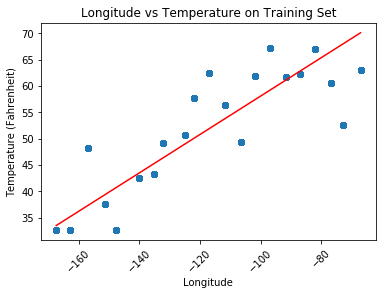

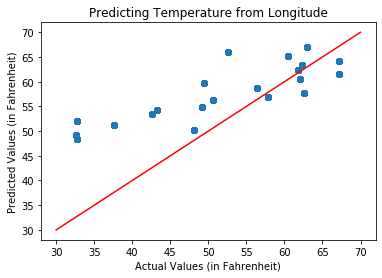





The model with only longitude as a feature is 30.843463943476213 percent accurate.






In [26]:
# Get data for x-axis and y-axis
X = weather_table['longitudinal_interval_avg'].values
Y = weather_table['long_interval_avg_temp'].values
# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Plot the training data
x_axis = X_train
y_axis = Y_train
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

# Overlay a regression line
x = np.unique(X_train)
y = np.unique(Y_train)
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Longitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.title("Longitude vs Temperature on Training Set")
plt.show()

# Compare training data to testing data
linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
prediction = linear_regressor.predict(X_test.reshape(-1,1))
plt.scatter(Y_test, prediction)

x = np.array([30, 70])
y = np.array([30, 70])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Actual Values (in Fahrenheit)")
plt.ylabel("Predicted Values (in Fahrenheit)")
plt.title("Predicting Temperature from Longitude")
plt.show()

long_temp_R2 = linear_regressor.score(X_test.reshape(-1,1), Y_test.reshape(-1,1))*100
print("\n\n\n\nThe model with only longitude as a feature is",long_temp_R2,"percent accurate.\n\n\n\n")

### Just as with temperature and longitude, we do the same with precipitation, wind, and snow depth. First by calculating the average precipitation, wind, and snow depth for a longitudinal interval. Then by separating the training and testing data. And lastly by seeing how well our training model predicts the actual value.

In [27]:
weather_table['long_interval_avg_precipitation'] = range(0, len(weather_table['PRCP'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_prec = interval['PRCP'].sum()/(len(interval['PRCP'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_precipitation'] = long_interval_avg_prec

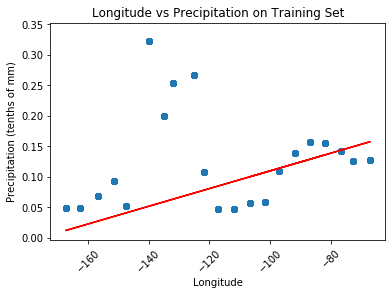

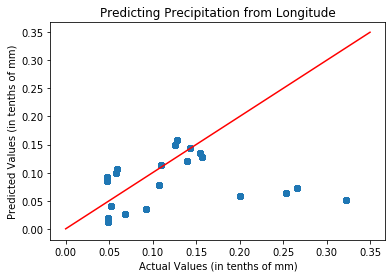





The model with only longitude as a feature is 36.45170256864388 percent accurate.






In [28]:
# Get data for x-axis and y-axis
X = weather_table['longitudinal_interval_avg'].values
Y = weather_table['long_interval_avg_precipitation'].values
# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Plot the training data
x_axis = X_train
y_axis = Y_train
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

# Overlay a regression line
x = np.array(X_train)
y = np.array(Y_train)
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Longitude")
plt.ylabel("Precipitation (tenths of mm)")
plt.title("Longitude vs Precipitation on Training Set")
plt.show()

# Compare training data to testing data
linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
prediction = linear_regressor.predict(X_test.reshape(-1,1))
plt.scatter(Y_test, prediction)

x = np.array([0, .35])
y = np.array([0, .35])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Actual Values (in tenths of mm)")
plt.ylabel("Predicted Values (in tenths of mm)")
plt.title("Predicting Precipitation from Longitude")
plt.show()
long_prcp_R2 = linear_regressor.score(X_test.reshape(-1,1), Y_test.reshape(-1,1))*100
print("\n\n\n\nThe model with only longitude as a feature is",long_prcp_R2,"percent accurate.\n\n\n\n")

In [29]:

weather_table['long_interval_avg_windspeed'] = range(0, len(weather_table['AWND'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_ws = interval['AWND'].sum()/(len(interval['AWND'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_windspeed'] = long_interval_avg_ws

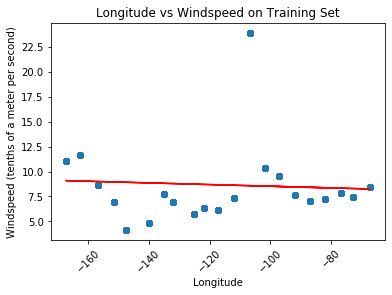

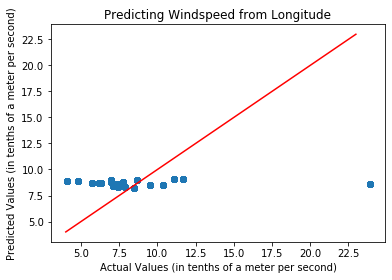





The model with only longitude as a feature is 0.16157798650822117 percent accurate.






In [30]:
# Get data for x-axis and y-axis
X = weather_table['longitudinal_interval_avg'].values
Y = weather_table['long_interval_avg_windspeed'].values
# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Plot the training data
x_axis = X_train
y_axis = Y_train
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

# Overlay a regression line
x = np.array(X_train)
y = np.array(Y_train)
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Longitude")
plt.ylabel("Windspeed (tenths of a meter per second)")
plt.title("Longitude vs Windspeed on Training Set")
plt.show()

# Compare training data to testing data
linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
prediction = linear_regressor.predict(X_test.reshape(-1,1))
plt.scatter(Y_test, prediction)

x = np.array([4, 23])
y = np.array([4, 23])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Actual Values (in tenths of a meter per second)")
plt.ylabel("Predicted Values (in tenths of a meter per second)")
plt.title("Predicting Windspeed from Longitude")
plt.show()

long_awnd_R2 = linear_regressor.score(X_test.reshape(-1,1), Y_test.reshape(-1,1))*100
print("\n\n\n\nThe model with only longitude as a feature is",long_awnd_R2,"percent accurate.\n\n\n\n")

In [31]:

weather_table['long_interval_avg_snowdepth'] = range(0, len(weather_table['SNWD'].values))
for interval_name, interval in weather_table.groupby("longitudinal_interval"):
    long_interval_avg_sd = interval['SNWD'].sum()/(len(interval['SNWD'].values))

    for index, row in interval.iterrows():
        weather_table.loc[index, 'long_interval_avg_snowdepth'] = long_interval_avg_sd

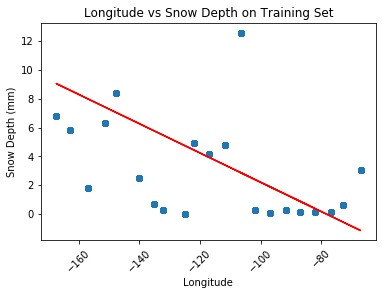

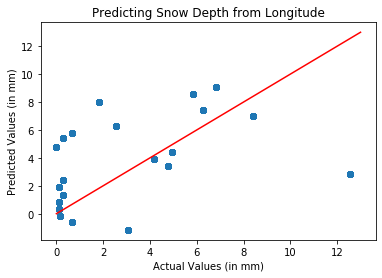





The model with only longitude as a feature is 33.146206702786216 percent accurate.






In [32]:
# Get data for x-axis and y-axis
X = weather_table['longitudinal_interval_avg'].values
Y = weather_table['long_interval_avg_snowdepth'].values
# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Plot the training data
x_axis = X_train
y_axis = Y_train
plt.xticks(rotation=45)
plt.scatter(x_axis, y_axis)

# Overlay a regression line
x = np.array(X_train)
y = np.array(Y_train)
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Longitude")
plt.ylabel("Snow Depth (mm)")
plt.title("Longitude vs Snow Depth on Training Set")
plt.show()

# Compare training data to testing data
linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))
prediction = linear_regressor.predict(X_test.reshape(-1,1))
plt.scatter(Y_test, prediction)

x = np.array([0, 13])
y = np.array([0, 13])
m, b = np.polyfit(x, y , 1)
plt.plot(x, m*x + b, color='r')

plt.xlabel("Actual Values (in mm)")
plt.ylabel("Predicted Values (in mm)")
plt.title("Predicting Snow Depth from Longitude")
plt.show()

long_snwd_R2 = linear_regressor.score(X_test.reshape(-1,1), Y_test.reshape(-1,1))*100
print("\n\n\n\nThe model with only longitude as a feature is",long_snwd_R2,"percent accurate.\n\n\n\n")

### We see from the analysis that sometimes longitude can be a valuable predictor of weather, such as with temperature, precipitation, and snow depth; and sometimes it isn't, as with wind speed. So what if we go back to using latitude as we did in the exploratory analysis and examine how well it improves the predictive power of our model? For this, we follow the same procedure as with did with only longitude, but add latitude as a feature.

In [33]:
# Splitdata between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X = weather_table[['longitudinal_interval_avg', 'latitude']]
Y = weather_table['long_interval_avg_temp']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train, Y_train)

print("\n\n\nWhen predicting temperature:")
print("The model with only longitude as a feature is",long_temp_R2,"percent accurate.")
print("The model with longitude and latitude as features is",linear_regressor.score(X_test, Y_test)*100,"percent accurate.\n\n\n\n")

# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X = weather_table[['longitudinal_interval_avg', 'latitude']]
Y = weather_table['long_interval_avg_precipitation']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train, Y_train)

print("When predicting precipitation:")
print("The model with only longitude as a feature is",long_prcp_R2,"percent accurate.")
print("The model with longitude and latitude as features is",linear_regressor.score(X_test, Y_test)*100,"percent accurate.\n\n\n\n")

# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X = weather_table[['longitudinal_interval_avg', 'latitude']]
Y = weather_table['long_interval_avg_windspeed']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train, Y_train)

print("When predicting windspeed:")
print("The model with only longitude as a feature is",long_awnd_R2,"percent accurate.")
print("The model with longitude and latitude as features is",linear_regressor.score(X_test, Y_test)*100,"percent accurate.\n\n\n\n")

# Split data between training and testing, with 20% of data going to testing, random state seed = 0 for reproducibility
X = weather_table[['longitudinal_interval_avg', 'latitude']]
Y = weather_table['long_interval_avg_snowdepth']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

linear_regressor = linear_model.LinearRegression()
model = linear_regressor.fit(X_train, Y_train)

print("When predicting snowdepth:")
print("The model with only longitude as a feature is",long_snwd_R2,"percent accurate.")
print("The model with longitude and latitude as features is",linear_regressor.score(X_test, Y_test)*100,"percent accurate.\n\n\n\n")




When predicting temperature:
The model with only longitude as a feature is 30.843463943476213 percent accurate.
The model with longitude and latitude as features is 46.0895764662982 percent accurate.




When predicting precipitation:
The model with only longitude as a feature is 36.45170256864388 percent accurate.
The model with longitude and latitude as features is 38.69745262818628 percent accurate.




When predicting windspeed:
The model with only longitude as a feature is 0.16157798650822117 percent accurate.
The model with longitude and latitude as features is 0.16155519617524486 percent accurate.




When predicting snowdepth:
The model with only longitude as a feature is 33.146206702786216 percent accurate.
The model with longitude and latitude as features is 33.21011045248453 percent accurate.






### We can see that when predicting temperature and precipitation, taking into account both longitude and latitude improves the predictive power of our model. However, for windspeed and snowdepth using both features doesn't seem to improve predictive power.

### It's interesting to see how something as simple as geographical location deepens the complexity of our understanding weather. It appears that some aspects of weather, like windspeed, have very little correlation with longitude or latitude, while other aspects like temperature, precipitation, and snow depth have a much stronger correlation.

### Furthermore. It was interesting to see just how much stronger of an effect longitude had on snowdepth and precipitation than latitude. So much so that even when taking into account latitude, our model predictive power showed little to virtual no improvement. In fact, of all the aspects of weather we examined, the only element that that latitude seems to affect is temperature.

### What we examined only took into consideration North America, so if we were to examine this further we would want to take into consideration other continents to better improve our analysis. However, even when only taking into account one continent, there's a lot of use in this sort of knowledge for those who live in it, especially citizens of the United States.

<div style="text-align:left"><span style="font-family:Arial; font-size:1.5em;"><b>Part 5: Insight & Policy Decision<b></span></div> <hr>

<b> 
* Throughout the seasons from winter to spring, there is a gradual increase in the density of states toward a higher concentration of higher temperature
* As the heat peaks mid-summer in July, there is a gradual decrease in temperature as the seasons transition into fall
* The temperature is trending lower from south (lower latitude) to north (higher latitude)
* The temperature range is narrower in south, and wider swing trending north
* The snowfall is trending higher from south (lower latitude) to north (higher latitude)
* There is not much snowfall in the south and only in winter time
* Winter months are longer with more snowfall in northern states
* The South has the highest temperatures while other regions such as the Northeast and Midwest remain relatively the same
* Longitude can be a valuable predictor of weather, such as with temperature, precipitation, and snow depth; and however, with wind speed it isnt
* When predicting temperature and precipitation, taking into account both longitude and latitude improves the predictive power of our model.